## Setup/Test Code

In [1]:
!pip install pandas numpy matplotlib seaborn wbdata plotly requests

  Using cached wbdata-1.1.0-py3-none-any.whl.metadata (2.1 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl.metadata (9.0 kB)
  Using cached cachetools-5.5.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached dateparser-1.2.2-py3-none-any.whl.metadata (29 kB)
  Using cached shelved_cache-0.3.1-py3-none-any.whl.metadata (4.7 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
  Using cached tzlocal-5.3.1-py3-none-any.whl.metadata (7.6 kB)
Using cached wbdata-1.1.0-py3-none-any.whl (18 kB)
Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
Using cached cachetools-5.5.2-py3-none-any.whl (10 kB)
Using cached dateparser-1.2.2-py3-none-any.whl (315 kB)
Using cached shelved_cache-0.3.1-py3-none-any.whl (7.8 kB)
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
Using cached tzlocal-5.3.1-py3-none-any.whl (18 kB)
  Attempting uninstall: cachetools
    Found existing installation: cachetools 6.2.1
    Uninstalling cachetools-6.2.1:
      Successfully uninstalled cach

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import wbdata
import requests
from datetime import datetime

Key '-1721574107002321384' not in persistent cache.
Key '-1104413910654251775' not in persistent cache.
Key '-4794705166608021601' not in persistent cache.
Key '2414655603893632494' not in persistent cache.
Key '-1952095376141111183' not in persistent cache.
Key '858908011376174784' not in persistent cache.
Key '1566974138406773086' not in persistent cache.
Key '4377977525924059053' not in persistent cache.
Key '-8248852492247058896' not in persistent cache.
Key '104060530634404927' not in persistent cache.
Key '-8296243899422538326' not in persistent cache.
Key '-3400370384223939597' not in persistent cache.
Key '-4600981123756604068' not in persistent cache.
Key '5684375773313052376' not in persistent cache.
Key '2182745296638549069' not in persistent cache.
Key '9203445287860936645' not in persistent cache.
Key '-1344214477448423487' not in persistent cache.
Key '4475699578090010180' not in persistent cache.
Key '7286702965607296147' not in persistent cache.
Key '-349685162311932903

In [3]:
%matplotlib inline
pd.options.plotting.backend = "plotly"

In [4]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)
#sns.set_style("whitegrid")
start_year = 1950
end_year = 2025

In [5]:
country_name = "China"
country_code = "CHN"

reform_periods = {"Great Leap Forward": (1958,1962),
                  "Post-Mao Transition": (1976,1978),
                  "Reform Era Start": (1978, 1992),
                  "WTO Entry": (2001, 2005),
                  "One-Child Policy": (1980, 2015)}

In [6]:
indicators = { "NY.GDP.MKTP.CD": "gdp",
               "NY.GDP.PCAP.CD": "gdp_percap",
               "SP.DYN.TFRT.IN": "fertility",
               "SP.POP.TOTL": "pop",
               "SP.POP.GROW": "pop_growth",
               "NV.AGR.TOTL.ZS": "ag_va", #ag as % of GDP
               "SE.PRM.ENRR": "edu_prim"}

In [7]:
def get_wb_data(indicator_dict, country_code, start, end):
    data = wbdata.get_dataframe(indicator_dict,
                                country = country_code,
                                date = (datetime(start, 1, 1), datetime(end, 1, 1)))
    data = data.reset_index()
    data["date"] = data["date"].astype(int)

    return data.sort_values("date")

In [8]:
china_df = get_wb_data(indicators, country_code, start_year, end_year)
china_df.head()

,date,gdp,gdp_percap,fertility,pop,pop_growth,ag_va,edu_prim
64,1960,5.984624e+10,89.715075,4.451,667070000.0,NaN,23.124958,NaN
63,1961,5.016230e+10,75.965501,3.863,660330000.0,-1.015528,35.719491,NaN
62,1962,4.731074e+10,71.061685,6.085,665770000.0,0.820456,38.902722,NaN
61,1963,5.081223e+10,74.468154,7.513,682335000.0,2.457647,39.771365,NaN
60,1964,5.982186e+10,85.661107,6.672,698355000.0,2.320683,37.957493,NaN


In [9]:
china_df.plot( x = "date", y = "gdp_percap", title = "China GDP per Capita")

In [10]:
china_df.plot(x = "date", y = ["fertility", "pop_growth", "ag_va"], title = "China Fertility Rate and Pop Growth",
             labels = dict(date = "Year", value = "Rate"))

In [11]:
#automate adding reform periods to plots
def reform_plot(df, y_col, title, periods = None):

    fig = df.plot(x = "date", y = y_col, title = title)

    if periods is None:
        periods = reform_periods.keys()

    for name in periods:
        start, end = reform_periods[name]
        fig.add_vrect(
            x0 = start,
            x1 = end,
            opacity = 0.12,
            annotation_text = name,
            annotation_position = "top left")

    fig.show()

In [12]:
def reform_plot_multi(df, y_cols, title, periods = None):

    fig = df.plot(x = "date", y = y_cols, title = title)

    if periods is None:
        periods = reform_periods.keys()

    for name in periods:
        start, end = reform_periods[name]
        fig.add_vrect(x0 = start, x1 = end, opacity = 0.10,
                     annotation_text = name,)

    fig.show()

In [13]:
reform_plot(china_df, "fertility", "Fertility Rate",
           periods = ["One-Child Policy"])

In [14]:
reform_plot(china_df, "gdp_percap", "GDP per Capita",
            periods = ["Reform Era Start", "WTO Entry"])

reform_plot(china_df, "gdp_percap", "GDP per Capita",
            periods = [])

### Data Cleaning

In [15]:
china_df = china_df.sort_values("date")
china_df.info()
china_df.describe()

<class 'wbdata.client.DataFrame'>
Index: 65 entries, 64 to 0
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        65 non-null     int64  
 1   gdp         65 non-null     float64
 2   gdp_percap  65 non-null     float64
 3   fertility   64 non-null     float64
 4   pop         65 non-null     float64
 5   pop_growth  64 non-null     float64
 6   ag_va       65 non-null     float64
 7   edu_prim    49 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 4.6 KB


,date,gdp,gdp_percap,fertility,pop,pop_growth,ag_va,edu_prim
count,65.00000,6.500000e+01,65.000000,64.000000,6.500000e+01,64.000000,65.000000,49.000000
mean,1992.00000,3.590132e+12,2630.587347,2.849891,1.113738e+09,1.168317,21.695856,109.926530
std,18.90767,5.648393e+12,4007.848926,1.750571,2.406213e+08,0.823711,11.343069,9.624039
min,1960.00000,4.731074e+10,71.061685,0.999000,6.603300e+08,-1.015528,6.775999,96.340011
25%,1976.00000,1.541968e+11,165.680988,1.627000,9.306850e+08,0.586458,10.009977,103.181120
50%,1992.00000,4.285024e+11,367.822652,1.866000,1.164970e+09,1.108385,21.249886,109.987053
75%,2008.00000,4.667346e+12,3523.443021,3.319000,1.324655e+09,1.536712,32.305585,115.190582
max,2024.00000,1.874380e+13,13303.148154,7.513000,1.412360e+09,2.787332,41.564610,133.966461


In [16]:
china_df["gdp_pc_growth"] = china_df["gdp_percap"].pct_change()*100
china_df["pop_growth_change"] = china_df["pop_growth"].diff()
china_df["fertility_change"] = china_df["fertility"].diff()
china_df["ag_va_change"] = china_df["ag_va"].diff()

In [17]:
reform_plot(china_df, "gdp_pc_growth", "GDP per Capita Growth (%)",
            periods = ["Reform Era Start", "WTO Entry"])

### Reform Period Comparison

In [18]:
def period_stats(df, col, start, end, window = 5):
    before = df[(df.date >= start-window) & (df.date < start)][col].mean()
    during = df[(df.date >= start) & (df.date <= end)][col].mean()
    after = df[(df.date > end) & (df.date <= end+window)][col].mean()

    return before, during, after

In [19]:
# GDP per capita growth rate before, during, and after periods in %
results = []

for name, (start, end) in reform_periods.items():
    b, d, a = period_stats(china_df, "gdp_pc_growth", start, end)

    results.append({"period": name,
                    "before": b,
                    "during": d,
                    "after": a})
pd.DataFrame(results)

,period,before,during,after
0,Great Leap Forward,NaN,-10.890572,6.702918
1,Post-Mao Transition,9.683211,-3.599290,7.751503
2,Reform Era Start,7.453848,5.087818,16.814414
3,WTO Entry,9.674560,12.943098,21.289115
4,One-Child Policy,3.639561,11.451359,5.474323


In [20]:
# Population growth rate before, during, and after periods change by value
popgrowth = []

for name, (start, end) in reform_periods.items():
    b, d, a = period_stats(china_df, "pop_growth", start, end)

    popgrowth.append({"period": name,
                    "before": b,
                    "during": d,
                    "after": a})
pd.DataFrame(popgrowth)

,period,before,during,after
0,Great Leap Forward,NaN,-0.097536,2.503546
1,Post-Mao Transition,2.264003,1.416100,1.357345
2,Reform Era Start,1.805172,1.406013,1.087596
3,WTO Entry,0.936990,0.640260,0.514675
4,One-Child Policy,1.469724,0.981854,0.447750


In [21]:
reform_plot_multi(china_df, ["ag_va", "fertility"], "Structural Transformation Indicators",
                  periods = ["Reform Era Start", "One-Child Policy"])

### Trend Smoothing

In [22]:
china_df["gdp_pc_growth_roll"] = china_df["gdp_pc_growth"].rolling(5).mean()
china_df["fertility_roll"] = china_df["fertility"].rolling(5).mean()

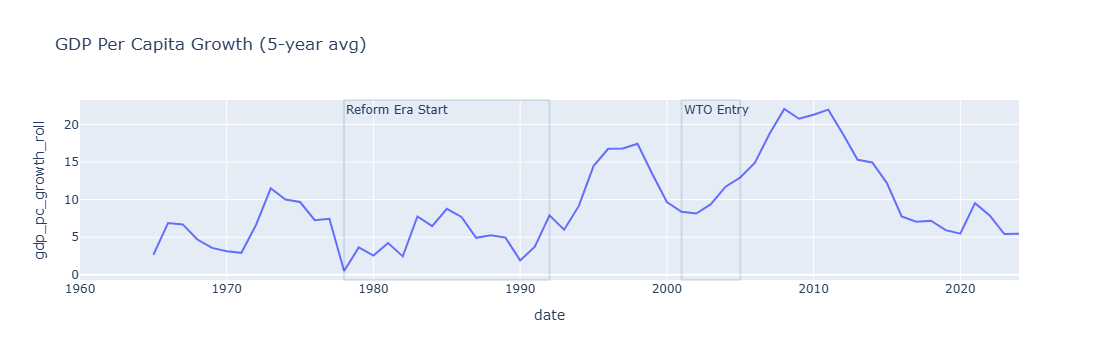

In [23]:
reform_plot(china_df, "gdp_pc_growth_roll", "GDP Per Capita Growth (5-year avg)",
            periods = ["Reform Era Start", "WTO Entry"])

In [24]:
# Top shifts in GDP PC Growth
china_df["growth_jump"] = china_df["gdp_pc_growth"].diff().abs()
china_df.nlargest(10, "growth_jump")[["date","gdp_pc_growth"]]

,date,gdp_pc_growth
45,1979,17.637565
46,1978,-15.653486
36,1988,12.593047
30,1994,25.528761
38,1986,-4.258144
2,2022,0.645357
47,1977,12.100141
48,1976,-7.244525
3,2021,21.265393
15,2009,10.637367


In [25]:
# Top shifts in Fertility change
china_df["growth_jump"] = china_df["fertility_change"].diff().abs()
china_df.nlargest(10, "growth_jump")[["date","fertility_change"]]

,date,fertility_change
62,1962,2.222
60,1964,-0.841
56,1968,0.702
55,1969,-0.333
61,1963,1.428
59,1965,-0.067
41,1983,-0.413
33,1991,-0.580
53,1971,-0.562
40,1984,0.048


## Fertility Policy Impact

In [26]:
reform_plot(china_df, "fertility", "Fertility vs One-Child Policy",
            periods = ["One-Child Policy", "Great Leap Forward"])

In [27]:
china_df["fertility_slope"] = china_df["fertility"].diff()
china_df[["date", "fertility_slope"]].tail(20)

,date,fertility_slope
19,2005,0.019
18,2006,0.020
17,2007,0.022
16,2008,0.035
15,2009,0.013
14,2010,-0.027
13,2011,-0.019
12,2012,0.130
11,2013,-0.084
10,2014,0.055


### Population Pyramids

In [28]:
chunks = []

for chunk in pd.read_csv(
        "WPP2024_Population1JanuaryBySingleAgeSex_Medium_1950-2023.csv.gz",
        compression="gzip",
        chunksize=200000
    ):

    china_chunk = chunk[chunk["Location"].str.contains("China", na=False)]
    chunks.append(china_chunk)

pop_age = pd.concat(chunks)

/tmp/ipykernel_165/1801361086.py:3: DtypeWarning:

Columns (2,7) have mixed types. Specify dtype option on import or set low_memory=False.

/tmp/ipykernel_165/1801361086.py:3: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.

/tmp/ipykernel_165/1801361086.py:3: DtypeWarning:

Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.



In [29]:
pop_age.columns

Index(['SortOrder', 'LocID', 'Notes', 'ISO3_code', 'ISO2_code', 'SDMX_code', 'LocTypeID', 'LocTypeName', 'ParentID',
       'Location', 'VarID', 'Variant', 'Time', 'MidPeriod', 'AgeGrp', 'AgeGrpStart', 'AgeGrpSpan', 'PopMale',
       'PopFemale', 'PopTotal'],
      dtype='object')

In [30]:
# filter out projection variants
china = pop_age[(pop_age["ISO3_code"] == "CHN") &
                (pop_age["Variant"] == "Medium")].copy()

In [31]:
# choosing years based on reforms
years = [1960, 1980, 2000, 2020]
china = china[china["Time"].isin(years)]

In [32]:
# need to make male/female long format for pop pyramid
pyr = china[["Time", "AgeGrp", "PopMale", "PopFemale"]].copy()

pyr = pyr.rename(columns = {"Time": "year",
                            "AgeGrp": "age_group"})

pyr_long = pyr.melt(id_vars = ["year", "age_group"],
                    value_vars = ["PopMale", "PopFemale"],
                    var_name = "sex",
                    value_name = "pop")

pyr_long["sex"] = pyr_long["sex"].str.replace("Pop", "")

In [33]:
# male values negative for left side
pyr_long["pop_plot"] = pyr_long["pop"]
pyr_long.loc[pyr_long["sex"] == "Male", "pop_plot"] *= -1

In [34]:
import plotly.express as px

def plot_pyramid(year):
    d = pyr_long[pyr_long["year"] == year]

    fig = px.bar(d, x = "pop_plot", y = "age_group", color = "sex",
                    orientation = "h",
                    title = f"China Population Pyramid - {year}",
                    hover_data = ["pop"])

    fig.update_layout(
        template = "plotly",
        xaxis_title = "Population",
        yaxis_title = "Age Group",
        barmode = "overlay")
    fig.show()

In [35]:
plot_pyramid(1960)
# wide at the base shows very high fertility
# this is pre-reform demographics

In [36]:
plot_pyramid(1980)
# one child policy starts -> base gets narrower and bulge moves up
# shows fertility is decreasing

In [37]:
plot_pyramid(2000)
# bulge now at the working age shows increasing lower fertility
# reform period

In [38]:
plot_pyramid(2020)
# population starts aging out as fertility rate stays below 2
# dependency of older population on younger population

## Sectoral Changes

In [39]:
china_df = china_df.sort_values("date")

In [40]:
fig = px.line(china_df, x = "date", y = "ag_va",
              title = "China's Agriculture as Share of GDP (%)",
              markers = True)

fig.update_layout(
    template = "plotly",
    xaxis_title = "Year",
    yaxis_title = "% of GDP")
fig.show()

In [41]:
# next look at fertility collapse if any, GDP accel, migration/urbanization

In [48]:
china_df[["date", "fertility"]].head()

fig = px.line(china_df, x = "date", y = "fertility",
              markers = True, title = "China Total Fertility Rate")

fig.update_layout(template = "plotly", xaxis_title = "Year",
                  yaxis_title = "Births per Woman")

# one-child policy begins in 1979; ends in 2015

fig.add_vline(x = 1979, line_dash = "dash", annotation_text = "One-child policy")
fig.add_vline(x = 2015, line_dash, "dash", annotation_text = "Policy relaxed")
fig.show()


SyntaxError: positional argument follows keyword argument (2702591144.py, line 12)